In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [298]:
#ticker
ticker_symbol = "VOO"

In [299]:
#Get data
ticker = yf.Ticker(ticker_symbol)
data = ticker.history(period="max")

print(data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-09-09 00:00:00-04:00   77.890920   77.890920   76.857440   76.994225   
2010-09-10 00:00:00-04:00   77.267821   77.404605   76.979057   77.343811   
2010-09-13 00:00:00-04:00   78.240447   78.377231   77.890888   78.316437   
2010-09-14 00:00:00-04:00   78.149322   78.635671   77.799763   78.301308   
2010-09-15 00:00:00-04:00   77.982123   78.559652   77.814942   78.498863   
...                               ...         ...         ...         ...   
2025-10-15 00:00:00-04:00  613.070007  616.210022  605.820007  611.429993   
2025-10-16 00:00:00-04:00  613.109985  614.799988  604.140015  607.390015   
2025-10-17 00:00:00-04:00  606.340027  612.020020  605.099976  610.760010   
2025-10-20 00:00:00-04:00  613.510010  618.010010  613.510010  617.169983   
2025-10-21 00:00:00-04:00  617.330017  618.719971  615.981018  617.090027   

In [300]:
#Predicting whether the stock price will go up or down in 90 days
data["7Days"]=data["Close"].shift(-90)

#Create target variable
data["Target"]=(data["7Days"]>data["Close"]).astype(int)


data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,7Days,Target
Date,,,,,,,,,,
2010-09-09 00:00:00-04:00,77.890920,77.890920,76.857440,76.994225,26500,0.0,0.0,0.0,90.953079,1
2010-09-10 00:00:00-04:00,77.267821,77.404605,76.979057,77.343811,8600,0.0,0.0,0.0,90.047401,1
2010-09-13 00:00:00-04:00,78.240447,78.377231,77.890888,78.316437,33750,0.0,0.0,0.0,89.939926,1
2010-09-14 00:00:00-04:00,78.149322,78.635671,77.799763,78.301308,59400,0.0,0.0,0.0,90.139458,1
2010-09-15 00:00:00-04:00,77.982123,78.559652,77.814942,78.498863,9250,0.0,0.0,0.0,90.692123,1


# Exploratory Data Analysis

In [301]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,7Days,Target
count,3803.000000,3803.000000,3803.000000,3803.000000,3.803000e+03,3803.000000,3803.000000,3803.0,3713.000000,3803.000000
mean,249.922628,251.212299,248.498820,249.962030,3.007436e+06,0.018316,0.000131,0.0,253.985798,0.772022
std,136.942488,137.659659,136.149599,136.970320,2.889662e+06,0.152097,0.008108,0.0,136.129004,0.419583
min,77.237408,77.404605,76.536240,76.994225,8.600000e+03,0.000000,0.000000,0.0,78.172279,0.000000
25%,144.714406,145.676872,144.001125,144.866135,1.117300e+06,0.000000,0.000000,0.0,148.907959,1.000000
50%,216.664328,217.597232,214.906425,216.465530,2.416850e+06,0.000000,0.000000,0.0,219.804855,1.000000
75%,356.427732,358.805438,354.190910,357.597061,4.102850e+06,0.000000,0.000000,0.0,359.301910,1.000000
max,619.229980,619.599976,615.981018,618.770020,3.541800e+07,1.812000,0.500000,0.0,618.770020,1.000000


The dataset is not that balanced. Need to balance the dataset due to the target mean being 0.77.

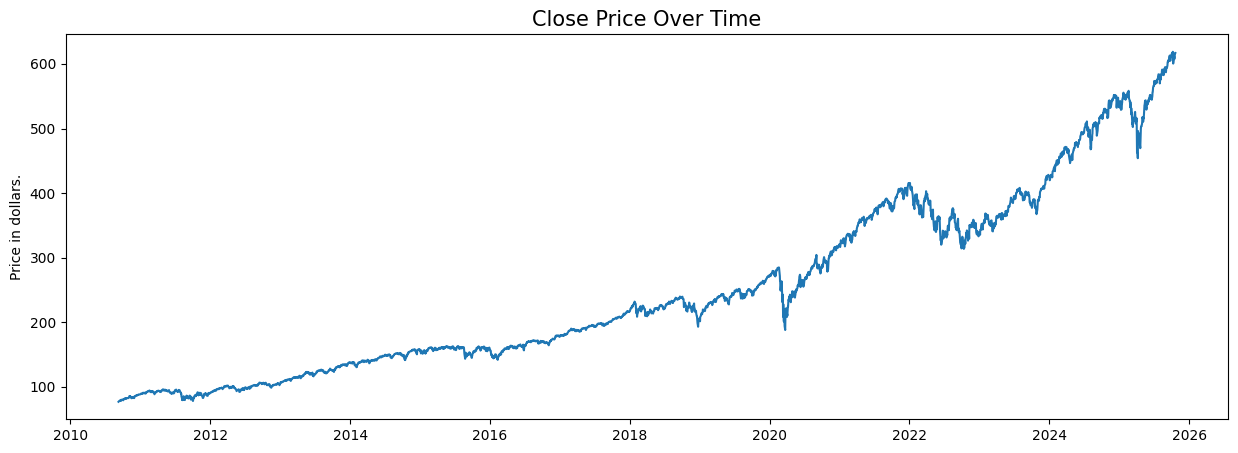

In [302]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Close Price Over Time', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

# Machine Learning

In [303]:
#Define features for ML and Target Variables
features = data[["Open", "High", "Low", "Close", "Volume"]]
target = data['Target']

features_scaled = StandardScaler().fit_transform(features)

In [304]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3042, 5)
Testing set shape: (761, 5)


In [305]:
#Create Random Forest Model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [306]:
#Model make predictions
predict = model.predict(X_test)

In [307]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8685939553219448
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       169
           1       0.91      0.93      0.92       592

    accuracy                           0.87       761
   macro avg       0.81      0.80      0.80       761
weighted avg       0.87      0.87      0.87       761

Confusion Matrix:
[[113  56]
 [ 44 548]]


In [308]:
#Test Logistic Regression Model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [309]:
#Make predictions
predict2 = model2.predict(X_test)

In [310]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict2)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict2)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict2)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7779237844940867
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       169
           1       0.78      1.00      0.88       592

    accuracy                           0.78       761
   macro avg       0.39      0.50      0.44       761
weighted avg       0.61      0.78      0.68       761

Confusion Matrix:
[[  0 169]
 [  0 592]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [311]:
#Create SVM Model
model3 = SVC(kernel='rbf')
model3.fit(X_train, y_train)

SVC()

In [312]:
#Make predictions
predict3 = model3.predict(X_test)

In [313]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict3)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict3)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict3)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8028909329829172
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.15      0.26       169
           1       0.80      0.99      0.89       592

    accuracy                           0.80       761
   macro avg       0.80      0.57      0.57       761
weighted avg       0.80      0.80      0.75       761

Confusion Matrix:
[[ 26 143]
 [  7 585]]


In [314]:
#XGBoost
model4 = XGBClassifier()
model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [315]:
predict4 = model4.predict(X_test)

In [316]:
#Evaluate the results of the model
accuracy = accuracy_score(y_test, predict4)
print("Accuracy:", accuracy)
classification = classification_report(y_test, predict4)
print("Classification Report:")
print(classification)
confusion = confusion_matrix(y_test, predict4)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8672798948751642
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       169
           1       0.90      0.93      0.92       592

    accuracy                           0.87       761
   macro avg       0.81      0.79      0.80       761
weighted avg       0.86      0.87      0.86       761

Confusion Matrix:
[[109  60]
 [ 41 551]]


Next 180 days Prediction Using XGBoost

In [317]:
last_day_data = data.tail(1)
print(last_day_data)

                                 Open        High         Low       Close  \
Date                                                                        
2025-10-21 00:00:00-04:00  617.330017  618.719971  615.981018  617.090027   

                            Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                         
2025-10-21 00:00:00-04:00  4166416        0.0           0.0            0.0   

                           7Days  Target  
Date                                      
2025-10-21 00:00:00-04:00    NaN       0  


In [318]:
new_features = last_day_data[["Open", "High", "Low", "Close", "Volume"]]
new_features_scaled = StandardScaler().fit_transform(new_features)
predict4 = model4.predict(new_features_scaled)
print(predict4)

[1]


In [320]:
if predict4[0] == 1:
    print("The stock price will go up over the next 180 days.")
else:
    print("The stock price will go down or stay the same over the next 180 days.")

The stock price will go up over the next 180 days.
